<a href="https://colab.research.google.com/github/Wilder-Calderon-Montoya/SML-personal-work-1-Wilder-Calderon-20225780/blob/main/Pedestrian_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PEDESTRIAN DETECTION WITH TENSORFLOW**

Pedestrian detection consist  identifying and localizing pedestrians in images . TensorFlow is a popular open-source machine learning framework that provides tools and libraries for building and training neural networks, including models for object detection tasks like pedestrian detection.

To perform pedestrian detection with TensorFlow, you would typically follow these steps:

1.   Dataset preparation
2.   Training
3.   Model selection
4.   Model configuration
5.   Evaluation
6.   Testing 

When you run the python version should be 3.9.16 in the case it's not so, you must put ctrl+shift+p then search in the box use fallback runtime version and then do click , then you must try again since the library that we will use in this project cannot be used with python 3.10

In [3]:
!python3 --version

Python 3.9.16


In this case ,you will start installing  packages which will help us 

!pip install -q tflite-model-maker: This line installs the tflite-model-maker package. The -q flag stands for "quiet," which suppresses unnecessary output during the installation process. tflite-model-maker is a Python library provided by TensorFlow that simplifies the process of training machine learning models and converting them to TensorFlow Lite models, which are optimized for mobile and embedded devices.

!pip install -q tflite-support: This line installs the tflite-support package. This package is also provided by TensorFlow and contains tools and utilities for working with TensorFlow Lite models. It provides support for various operations like model quantization, delegate interfaces, and more.

In [4]:
!pip install -q tflite-model-maker 
!pip install -q tflite-support 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.8/203.8 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 100.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.1/498.1 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 79.2 MB/s eta 

Now you will import the required packages using "numpy as np".NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and arrays.
It is also used for utilities (Utility functions help you to visualize the functions).

"recommendation if the code is rejected try again"





In [6]:
import numpy as np
import os

from tflite_model_maker.config import ExportFormat, QuantizationConfig
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

from tflite_support import metadata

import tensorflow as tf
assert tf.__version__.startswith('2')

tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)

### **1.   Dataset preparation**

You can Obtain or create a dataset of images or videos labeled with bounding boxes around pedestrians. This dataset should include both positive samples (images with pedestrians) and negative samples (images without pedestrians). It is noted in the image below an example of pedestrians.

![pedestrian_figurine_sample.jpg](https://repository-images.githubusercontent.com/185267361/a19fc900-700d-11e9-8070-d225f73a3657)

You will start with uploading the dataset.

In [7]:
!git clone https://github.com/Wilder-Calderon-Montoya/pedestrian_data.git 

Cloning into 'pedestrian_data'...
remote: Enumerating objects: 2684, done.
remote: Total 2684 (delta 0), reused 0 (delta 0), pack-reused 2684
Receiving objects: 100% (2684/2684), 185.10 MiB | 16.05 MiB/s, done.
Resolving deltas: 100% (1277/1277), done.


In [8]:
!mv /content/pedestrian_data/* .

## **2.   Training**

Training is a fundamental step in machine learning that involves teaching a model to make accurate predictions or perform a specific task based on input data. The training process enables the model to learn patterns, relationships, and representations from the data, enabling it to make predictions or take actions on new, unseen examples.

In this case i will use the codes below.The object_detector.DataLoader.from_pascal_voc() function takes the paths to the image and annotation directories, as well as a list of class names, and returns a DataLoader object or similar data structure.

The purpose of this code is to organize and preprocess the data so that it can be fed into an object detection model for training or evaluation. The variables train_data and val_data contain the loaded data in a format suitable for further processing or training with an object detection algorithm.


In [9]:
train_data = object_detector.DataLoader.from_pascal_voc(
    '/content/pedestrian_detection/Train/Train/JPEGImages',
    '/content/pedestrian_detection/Train/Train/Annotations',
    ['person', 'person-like']
)

val_data = object_detector.DataLoader.from_pascal_voc(
    '/content/pedestrian_detection/Val/Val/JPEGImages',
    '/content/pedestrian_detection/Val/Val/Annotations',
    ['person', 'person-like']
)

As noted below the code initializes a variable named test_data to store the loaded test data. It calls the from_pascal_voc function, likely provided by the object_detector.DataLoader class or module, with three arguments:

The path to the directory containing the test images ('/content/pedestrian_detection/Test/Test/JPEGImages').
The path to the directory containing the annotations corresponding to the test images ('/content/pedestrian_detection/Test/Test/Annotations').
A list of class names (['person', 'person-like']) that are relevant to the object detection task.

In [10]:
test_data = object_detector.DataLoader.from_pascal_voc(
    '/content/pedestrian_detection/Test/Test/JPEGImages',
    '/content/pedestrian_detection/Test/Test/Annotations',
    ['person', 'person-like']
)

### **3. Model selection**

EfficientDet-Lite0 specifically refers to the smallest and most lightweight variant of the EfficientDet-Lite models. It is optimized for deployment on resource-constrained devices with low computational capabilities. EfficientDet-Lite0 offers faster inference speed and lower memory requirements. you can also take precision into account.

In [11]:
spec = model_spec.get('efficientdet_lite0')

## **4.   Model configuration**

1.model is a variable that will store the created object detection model.

2.The object_detector.create() function (assuming it belongs to the object_detector module or class) is called to create the model.

3.The function takes several arguments:

* train_data: This is the training data that you previously loaded and prepared using the DataLoader (or similar) object.

* model_spec: This refers to the model specification, which likely describes the architecture or type of object detection model to be created. 

* batch_size: This parameter specifies the number of samples (images) that will be processed in each training iteration. In this case, a batch size of 64 is chosen.

* train_whole_model: This parameter determines whether the entire model will be trained or only specific parts. When set to True, the whole model (including the backbone and detection heads) will be trained. When set to False, only specific layers may be trained, while the rest are frozen.

* epochs: This parameter specifies the number of training epochs, which represents the number of times the model will iterate over the entire training dataset during training.

* validation_data: This is the validation data, similar to the train_data but used for evaluating the model's performance during training.






In [12]:
model = object_detector.create(train_data, model_spec=spec, batch_size=64, train_whole_model=True, epochs=20, validation_data=val_data)

Epoch 1/20
14/14 [==============================] - 84s 3s/step - det_loss: 1.6003 - cls_loss: 1.0132 - box_loss: 0.0117 - reg_l2_loss: 0.0630 - loss: 1.6633 - learning_rate: 0.0437 - gradient_norm: 1.2139 - val_det_loss: 1.3219 - val_cls_loss: 0.8376 - val_box_loss: 0.0097 - val_reg_l2_loss: 0.0630 - val_loss: 1.3849
Epoch 2/20
14/14 [==============================] - 36s 3s/step - det_loss: 0.9149 - cls_loss: 0.5388 - box_loss: 0.0075 - reg_l2_loss: 0.0630 - loss: 0.9779 - learning_rate: 0.0787 - gradient_norm: 1.2879 - val_det_loss: 2.4255 - val_cls_loss: 1.8371 - val_box_loss: 0.0118 - val_reg_l2_loss: 0.0631 - val_loss: 2.4885
Epoch 3/20
14/14 [==============================] - 38s 3s/step - det_loss: 0.6310 - cls_loss: 0.3597 - box_loss: 0.0054 - reg_l2_loss: 0.0631 - loss: 0.6942 - learning_rate: 0.0766 - gradient_norm: 1.5157 - val_det_loss: 1.8213 - val_cls_loss: 1.1753 - val_box_loss: 0.0129 - val_reg_l2_loss: 0.0632 - val_loss: 1.8846
Epoch 4/20
14/14 [======================

## **5.   Evaluation**

Evaluation refers to the process of assessing the performance and quality of a trained model on unseen or test data. It helps in understanding how well the model generalizes to new examples and provides insights into its effectiveness for the intended task.

In this case , Machine learning model applies its inference or prediction capabilities to the training dataset and calculates various evaluation metrics to assess its performance. The specific evaluation metrics and outputs will depend on the type of model.

You must take into account the following:

1.model: This variable represents the machine learning model that you have trained or loaded.

2.evaluate(): is a method or function provided by the machine learning framework or library that allows you to evaluate the performance of the model on a given data set.

* train_data: This parameter refers to the dataset on which you want to evaluate the model's performance. In this case, it seems like you are evaluating the model on the training data (train_data).

In [13]:
model.evaluate(train_data)

15/15 [==============================] - 41s 2s/step



{'AP': 0.6815787,
 'AP50': 0.94810146,
 'AP75': 0.81392944,
 'APs': 0.041283946,
 'APm': 0.48965204,
 'APl': 0.7178998,
 'ARmax1': 0.37638375,
 'ARmax10': 0.7406136,
 'ARmax100': 0.7647477,
 'ARs': 0.08235294,
 'ARm': 0.6070493,
 'ARl': 0.7962236,
 'AP_/person': 0.66847456,
 'AP_/person-like': 0.69468284}

* val_data: This parameter refers to the dataset on which you want to evaluate the model's performance. In this case, it seems like you are evaluating the model on the validation data (val_data).

In [14]:
model.evaluate(val_data)

3/3 [==============================] - 19s 3s/step



{'AP': 0.55132174,
 'AP50': 0.86211634,
 'AP75': 0.6004772,
 'APs': 0.016472088,
 'APm': 0.16602786,
 'APl': 0.5983366,
 'ARmax1': 0.3699697,
 'ARmax10': 0.65853167,
 'ARmax100': 0.68849564,
 'ARs': 0.1,
 'ARm': 0.2971698,
 'ARl': 0.7284449,
 'AP_/person': 0.47594577,
 'AP_/person-like': 0.6266977}

* test_data: This parameter refers to the dataset on which you want to evaluate the model's performance. In this case, it seems like you are evaluating the model on the test data (test_data).

In [15]:
model.evaluate(test_data)

4/4 [==============================] - 21s 3s/step



{'AP': 0.4652639,
 'AP50': 0.81871897,
 'AP75': 0.47419775,
 'APs': 0.15157443,
 'APm': 0.3806664,
 'APl': 0.4934404,
 'ARmax1': 0.27467886,
 'ARmax10': 0.5718749,
 'ARmax100': 0.62377733,
 'ARs': 0.2,
 'ARm': 0.53803915,
 'ARl': 0.64554924,
 'AP_/person': 0.44361326,
 'AP_/person-like': 0.48691455}

As noted below the code is used for exporting a machine learning model to the TensorFlow Lite (TFLite) format.

model: This variable represents the machine learning model that you have trained or loaded.

export(): It is a method or function provided by the machine learning framework or library that allows you to export or save the model in a specific format.

export_dir: This parameter specifies the directory where the exported model will be saved. In this case, the current directory ('.') is specified as the export directory.

tflite_filename: This parameter specifies the filename of the exported model. In this case, the name 'pedestrian_detection.tflite' indicates that the model will be saved with the given filename and the TFLite file extension.


In [16]:
model.export(export_dir='.', tflite_filename='pedestrian_detection.tflite')

How it is noted below i use this code take into account the following:

model: This variable represents the machine learning model that you have trained or loaded.

evaluate_tflite(): It is a method or function provided by the machine learning framework or library that allows you to evaluate the performance of a TFLite model on a given dataset.

'pedestrian_detection.tflite': This parameter specifies the path or filename of the TFLite model file that you want to evaluate.

In [17]:
model.evaluate_tflite('pedestrian_detection.tflite', test_data)

235/235 [==============================] - 677s 3s/step



{'AP': 0.4569604,
 'AP50': 0.817187,
 'AP75': 0.4543659,
 'APs': 0.15148515,
 'APm': 0.37377086,
 'APl': 0.4838794,
 'ARmax1': 0.2694602,
 'ARmax10': 0.54603297,
 'ARmax100': 0.56828064,
 'ARs': 0.15,
 'ARm': 0.4760058,
 'ARl': 0.592176,
 'AP_/person': 0.43555754,
 'AP_/person-like': 0.4783633}

* Download the TFLite model to your local computer.

In [18]:
from google.colab import files
files.download('pedestrian_detection.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **6. Testing**

In [19]:
#@title Load the trained TFLite model and define some visualization functions

#@markdown This code comes from the TFLite Object Detection [Raspberry Pi sample](https://github.com/tensorflow/examples/tree/master/lite/examples/object_detection/raspberry_pi).

import platform
from typing import List, NamedTuple
import json
from tflite_support import metadata
import cv2

Interpreter = tf.lite.Interpreter
load_delegate = tf.lite.experimental.load_delegate

# pylint: enable=g-import-not-at-top


class ObjectDetectorOptions(NamedTuple):
  """A config to initialize an object detector."""

  enable_edgetpu: bool = False
  """Enable the model to run on EdgeTPU."""

  label_allow_list: List[str] = None
  """The optional allow list of labels."""

  label_deny_list: List[str] = None
  """The optional deny list of labels."""

  max_results: int = -1
  """The maximum number of top-scored detection results to return."""

  num_threads: int = 1
  """The number of CPU threads to be used."""

  score_threshold: float = 0.0
  """The score threshold of detection results to return."""


class Rect(NamedTuple):
  """A rectangle in 2D space."""
  left: float
  top: float
  right: float
  bottom: float


class Category(NamedTuple):
  """A result of a classification task."""
  label: str
  score: float
  index: int


class Detection(NamedTuple):
  """A detected object as the result of an ObjectDetector."""
  bounding_box: Rect
  categories: List[Category]


class ObjectDetector:
  """A wrapper class for a TFLite object detection model."""

  _OUTPUT_LOCATION_NAME = 'location'
  _OUTPUT_CATEGORY_NAME = 'category'
  _OUTPUT_SCORE_NAME = 'score'
  _OUTPUT_NUMBER_NAME = 'number of detections'

  def __init__(
      self,
      model_path: str,
      options: ObjectDetectorOptions = ObjectDetectorOptions()
  ) -> None:
    """Initialize a TFLite object detection model.
    Args:
        model_path: Path to the TFLite model.
        options: The config to initialize an object detector. (Optional)
    Raises:
        ValueError: If the TFLite model is invalid.
        OSError: If the current OS isn't supported by EdgeTPU.
    """

    # Load metadata from model.
    displayer = metadata.MetadataDisplayer.with_model_file(model_path)

    # Save model metadata for preprocessing later.
    model_metadata = json.loads(displayer.get_metadata_json())
    process_units = model_metadata['subgraph_metadata'][0]['input_tensor_metadata'][0]['process_units']
    mean = 0.0
    std = 1.0
    for option in process_units:
      if option['options_type'] == 'NormalizationOptions':
        mean = option['options']['mean'][0]
        std = option['options']['std'][0]
    self._mean = mean
    self._std = std

    # Load label list from metadata.
    file_name = displayer.get_packed_associated_file_list()[0]
    label_map_file = displayer.get_associated_file_buffer(file_name).decode()
    label_list = list(filter(lambda x: len(x) > 0, label_map_file.splitlines()))
    self._label_list = label_list

    # Initialize TFLite model.
    interpreter = Interpreter(
        model_path=model_path, num_threads=options.num_threads)

    interpreter.allocate_tensors()
    input_detail = interpreter.get_input_details()[0]

    # From TensorFlow 2.6, the order of the outputs become undefined.
    # Therefore we need to sort the tensor indices of TFLite outputs and to know
    # exactly the meaning of each output tensor. For example, if
    # output indices are [601, 599, 598, 600], tensor names and indices aligned
    # are:
    #   - location: 598
    #   - category: 599
    #   - score: 600
    #   - detection_count: 601
    # because of the op's ports of TFLITE_DETECTION_POST_PROCESS
    # (https://github.com/tensorflow/tensorflow/blob/a4fe268ea084e7d323133ed7b986e0ae259a2bc7/tensorflow/lite/kernels/detection_postprocess.cc#L47-L50).
    sorted_output_indices = sorted(
        [output['index'] for output in interpreter.get_output_details()])
    self._output_indices = {
        self._OUTPUT_LOCATION_NAME: sorted_output_indices[0],
        self._OUTPUT_CATEGORY_NAME: sorted_output_indices[1],
        self._OUTPUT_SCORE_NAME: sorted_output_indices[2],
        self._OUTPUT_NUMBER_NAME: sorted_output_indices[3],
    }

    self._input_size = input_detail['shape'][2], input_detail['shape'][1]
    self._is_quantized_input = input_detail['dtype'] == np.uint8
    self._interpreter = interpreter
    self._options = options

  def detect(self, input_image: np.ndarray) -> List[Detection]:
    """Run detection on an input image.
    Args:
        input_image: A [height, width, 3] RGB image. Note that height and width
          can be anything since the image will be immediately resized according
          to the needs of the model within this function.
    Returns:
        A Person instance.
    """
    image_height, image_width, _ = input_image.shape

    input_tensor = self._preprocess(input_image)

    self._set_input_tensor(input_tensor)
    self._interpreter.invoke()

    # Get all output details
    boxes = self._get_output_tensor(self._OUTPUT_LOCATION_NAME)
    classes = self._get_output_tensor(self._OUTPUT_CATEGORY_NAME)
    scores = self._get_output_tensor(self._OUTPUT_SCORE_NAME)
    count = int(self._get_output_tensor(self._OUTPUT_NUMBER_NAME))

    return self._postprocess(boxes, classes, scores, count, image_width,
                             image_height)

  def _preprocess(self, input_image: np.ndarray) -> np.ndarray:
    """Preprocess the input image as required by the TFLite model."""

    # Resize the input
    input_tensor = cv2.resize(input_image, self._input_size)

    # Normalize the input if it's a float model (aka. not quantized)
    if not self._is_quantized_input:
      input_tensor = (np.float32(input_tensor) - self._mean) / self._std

    # Add batch dimension
    input_tensor = np.expand_dims(input_tensor, axis=0)

    return input_tensor

  def _set_input_tensor(self, image):
    """Sets the input tensor."""
    tensor_index = self._interpreter.get_input_details()[0]['index']
    input_tensor = self._interpreter.tensor(tensor_index)()[0]
    input_tensor[:, :] = image

  def _get_output_tensor(self, name):
    """Returns the output tensor at the given index."""
    output_index = self._output_indices[name]
    tensor = np.squeeze(self._interpreter.get_tensor(output_index))
    return tensor

  def _postprocess(self, boxes: np.ndarray, classes: np.ndarray,
                   scores: np.ndarray, count: int, image_width: int,
                   image_height: int) -> List[Detection]:
    """Post-process the output of TFLite model into a list of Detection objects.
    Args:
        boxes: Bounding boxes of detected objects from the TFLite model.
        classes: Class index of the detected objects from the TFLite model.
        scores: Confidence scores of the detected objects from the TFLite model.
        count: Number of detected objects from the TFLite model.
        image_width: Width of the input image.
        image_height: Height of the input image.
    Returns:
        A list of Detection objects detected by the TFLite model.
    """
    results = []

    # Parse the model output into a list of Detection entities.
    for i in range(count):
      if scores[i] >= self._options.score_threshold:
        y_min, x_min, y_max, x_max = boxes[i]
        bounding_box = Rect(
            top=int(y_min * image_height),
            left=int(x_min * image_width),
            bottom=int(y_max * image_height),
            right=int(x_max * image_width))
        class_id = int(classes[i])
        category = Category(
            score=scores[i],
            label=self._label_list[class_id],  # 0 is reserved for background
            index=class_id)
        result = Detection(bounding_box=bounding_box, categories=[category])
        results.append(result)

    # Sort detection results by score ascending
    sorted_results = sorted(
        results,
        key=lambda detection: detection.categories[0].score,
        reverse=True)

    # Filter out detections in deny list
    filtered_results = sorted_results
    if self._options.label_deny_list is not None:
      filtered_results = list(
          filter(
              lambda detection: detection.categories[0].label not in self.
              _options.label_deny_list, filtered_results))

    # Keep only detections in allow list
    if self._options.label_allow_list is not None:
      filtered_results = list(
          filter(
              lambda detection: detection.categories[0].label in self._options.
              label_allow_list, filtered_results))

    # Only return maximum of max_results detection.
    if self._options.max_results > 0:
      result_count = min(len(filtered_results), self._options.max_results)
      filtered_results = filtered_results[:result_count]

    return filtered_results


_MARGIN = 10  # pixels
_ROW_SIZE = 10  # pixels
_FONT_SIZE = 1
_FONT_THICKNESS = 1
_TEXT_COLOR = (0, 0, 255)  # red


def visualize(
    image: np.ndarray,
    detections: List[Detection],
) -> np.ndarray:
  """Draws bounding boxes on the input image and return it.
  Args:
    image: The input RGB image.
    detections: The list of all "Detection" entities to be visualize.
  Returns:
    Image with bounding boxes.
  """
  for detection in detections:
    # Draw bounding_box
    start_point = detection.bounding_box.left, detection.bounding_box.top
    end_point = detection.bounding_box.right, detection.bounding_box.bottom
    cv2.rectangle(image, start_point, end_point, _TEXT_COLOR, 3)

    # Draw label and score
    category = detection.categories[0]
    class_name = category.label
    probability = round(category.score, 2)
    result_text = class_name + ' (' + str(probability) + ')'
    text_location = (_MARGIN + detection.bounding_box.left,
                     _MARGIN + _ROW_SIZE + detection.bounding_box.top)
    cv2.putText(image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,
                _FONT_SIZE, _TEXT_COLOR, _FONT_THICKNESS)

  return image

### Run object detection and show the detection results

This code below  performs object detection on an input image using a trained TensorFlow Lite (TFLite) model and displays the detection results. 

You must take into account the following :

* It imports the necessary libraries, including the PIL (Python Imaging Library) for image manipulation.

* INPUT_IMAGE_PATH: Specifies the path to the input image on which object detection will be performed.

* DETECTION_THRESHOLD: Sets the threshold for the detection confidence score. Detected objects with a score above this threshold will be considered for visualization.

* TFLITE_MODEL_PATH: Specifies the path to the TFLite model file that will be used for object detection.

* It opens the input image using PIL's Image.open() function and converts it to the RGB color space.

* It resizes the image to a maximum size of 512x512 pixels while preserving the aspect ratio.

* It converts the resized image to a NumPy array using np.asarray().

* It creates an ObjectDetectorOptions object, specifying parameters such as the number of threads for parallel execution and the detection threshold.

* It initializes an ObjectDetector object by loading the TFLite model specified by TFLITE_MODEL_PATH and providing the options defined in the previous step.

* It performs object detection on the image using the detect() method of the ObjectDetector object. The detected objects are stored in the detections variable.

* It visualizes the detected objects by drawing keypoints and edges on the image using a function called visualize(). The modified image is stored in image_np.

* Finally, it displays the detection result by converting the NumPy array image_np back to a PIL image using Image.fromarray().

wget: option requires an argument -- 'O'
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


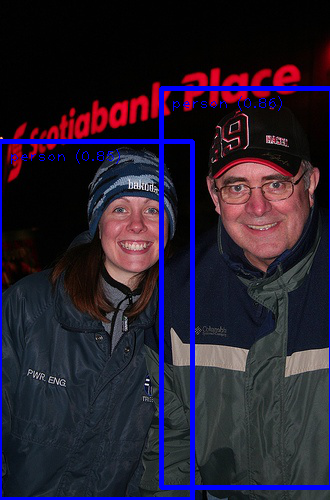

In [20]:
from PIL import Image


INPUT_IMAGE_PATH = "/content/pedestrian_detection/Test/Test/JPEGImages/image (12).jpg" #@param {type:"string"}
DETECTION_THRESHOLD = 0.5 #@param {type:"number"}
TFLITE_MODEL_PATH = "pedestrian_detection.tflite" #@param {type:"string"}

TEMP_FILE = '/tmp/image.png'

!wget -q -O $TEMP_FILE $INPUT_IMAGE_URL
image = Image.open(INPUT_IMAGE_PATH).convert('RGB')
image.thumbnail((512, 512), Image.ANTIALIAS)
image_np = np.asarray(image)

# Load the TFLite model
options = ObjectDetectorOptions(
      num_threads=4,
      score_threshold=DETECTION_THRESHOLD,
)
detector = ObjectDetector(model_path=TFLITE_MODEL_PATH, options=options)

# Run object detection estimation using the model.
detections = detector.detect(image_np)

# Draw keypoints and edges on input image
image_np = visualize(image_np, detections)

# Show the detection result
Image.fromarray(image_np)